CODE BLOCK: 1

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.04MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.50MB/s]


CODE BLOCK: 5

In [6]:
batch_size = 64

train_kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
test_kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **test_kwargs)


CODE BLOCK: 6

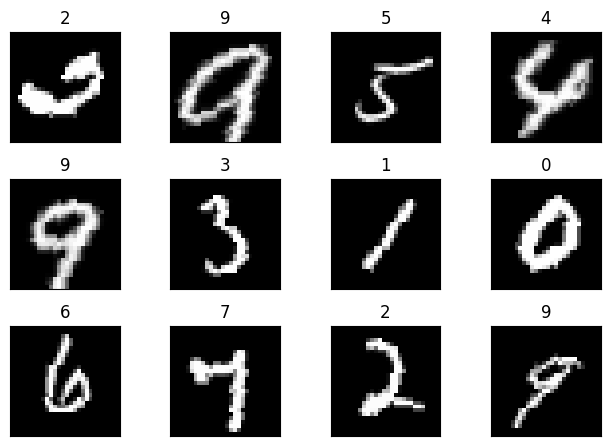

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer, criterion):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)

    # Calculate loss
    loss = criterion(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()

    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader, criterion):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



CODE BLOCK: 7

FINAL MODEL

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6           [-1, 16, 10, 10]           2,320
       BatchNorm2d-7           [-1, 16, 10, 10]              32
            Conv2d-8             [-1, 32, 8, 8]           4,640
       BatchNorm2d-9             [-1, 32, 8, 8]              64
        MaxPool2d-10             [-1, 32, 4, 4]               0
           Conv2d-11              [-1, 8, 4, 4]             264
           Conv2d-12             [-1, 16, 4, 4]           1,168
      BatchNorm2d-13             [-1, 16, 4, 4]              32
           Conv2d-14             [-1, 1

Train: Loss=0.0182 Batch_id=937 Accuracy=93.04: 100%|██████████| 938/938 [00:23<00:00, 39.61it/s]


Test set: Average loss: 0.0014, Accuracy: 58417/60000 (97.36%)

Epoch 2


Train: Loss=0.0070 Batch_id=937 Accuracy=97.67: 100%|██████████| 938/938 [00:23<00:00, 40.61it/s]


Test set: Average loss: 0.0010, Accuracy: 58814/60000 (98.02%)

Epoch 3


Train: Loss=0.0797 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [00:22<00:00, 41.75it/s]


Test set: Average loss: 0.0008, Accuracy: 59006/60000 (98.34%)

Epoch 4


Train: Loss=0.1583 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [00:23<00:00, 40.76it/s]


Test set: Average loss: 0.0007, Accuracy: 59089/60000 (98.48%)

Epoch 5


Train: Loss=0.2148 Batch_id=937 Accuracy=98.60: 100%|██████████| 938/938 [00:23<00:00, 40.12it/s]


Test set: Average loss: 0.0006, Accuracy: 59208/60000 (98.68%)

Epoch 6


Train: Loss=0.0086 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:23<00:00, 40.24it/s]


Test set: Average loss: 0.0005, Accuracy: 59390/60000 (98.98%)

Epoch 7


Train: Loss=0.0184 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [00:22<00:00, 42.12it/s]


Test set: Average loss: 0.0005, Accuracy: 59377/60000 (98.96%)

Epoch 8


Train: Loss=0.0067 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [00:23<00:00, 40.43it/s]


Test set: Average loss: 0.0005, Accuracy: 59376/60000 (98.96%)

Epoch 9


Train: Loss=0.0288 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:23<00:00, 40.42it/s]


Test set: Average loss: 0.0004, Accuracy: 59457/60000 (99.09%)

Epoch 10


Train: Loss=0.0219 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:23<00:00, 40.28it/s]


Test set: Average loss: 0.0004, Accuracy: 59466/60000 (99.11%)

Epoch 11


Train: Loss=0.0122 Batch_id=937 Accuracy=98.95: 100%|██████████| 938/938 [00:22<00:00, 41.98it/s]


Test set: Average loss: 0.0005, Accuracy: 59439/60000 (99.06%)

Epoch 12


Train: Loss=0.0644 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:23<00:00, 40.39it/s]


Test set: Average loss: 0.0004, Accuracy: 59520/60000 (99.20%)

Epoch 13


Train: Loss=0.0292 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:22<00:00, 40.82it/s]


Test set: Average loss: 0.0004, Accuracy: 59520/60000 (99.20%)

Epoch 14


Train: Loss=0.0026 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:22<00:00, 40.82it/s]


Test set: Average loss: 0.0005, Accuracy: 59424/60000 (99.04%)

Epoch 15


Train: Loss=0.0098 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:22<00:00, 41.07it/s]


Test set: Average loss: 0.0004, Accuracy: 59568/60000 (99.28%)

Epoch 16


Train: Loss=0.0304 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:22<00:00, 41.62it/s]


Test set: Average loss: 0.0003, Accuracy: 59681/60000 (99.47%)

Epoch 17


Train: Loss=0.1447 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:23<00:00, 40.56it/s]


Test set: Average loss: 0.0002, Accuracy: 59709/60000 (99.52%)

Epoch 18


Train: Loss=0.0009 Batch_id=937 Accuracy=99.49: 100%|██████████| 938/938 [00:22<00:00, 40.98it/s]


Test set: Average loss: 0.0002, Accuracy: 59727/60000 (99.55%)

Epoch 19


Train: Loss=0.0045 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:23<00:00, 40.42it/s]


Test set: Average loss: 0.0002, Accuracy: 59751/60000 (99.58%)

Epoch 20


Train: Loss=0.0411 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:22<00:00, 41.89it/s]


Test set: Average loss: 0.0002, Accuracy: 59733/60000 (99.56%)



Text(0.5, 1.0, 'Test Accuracy')

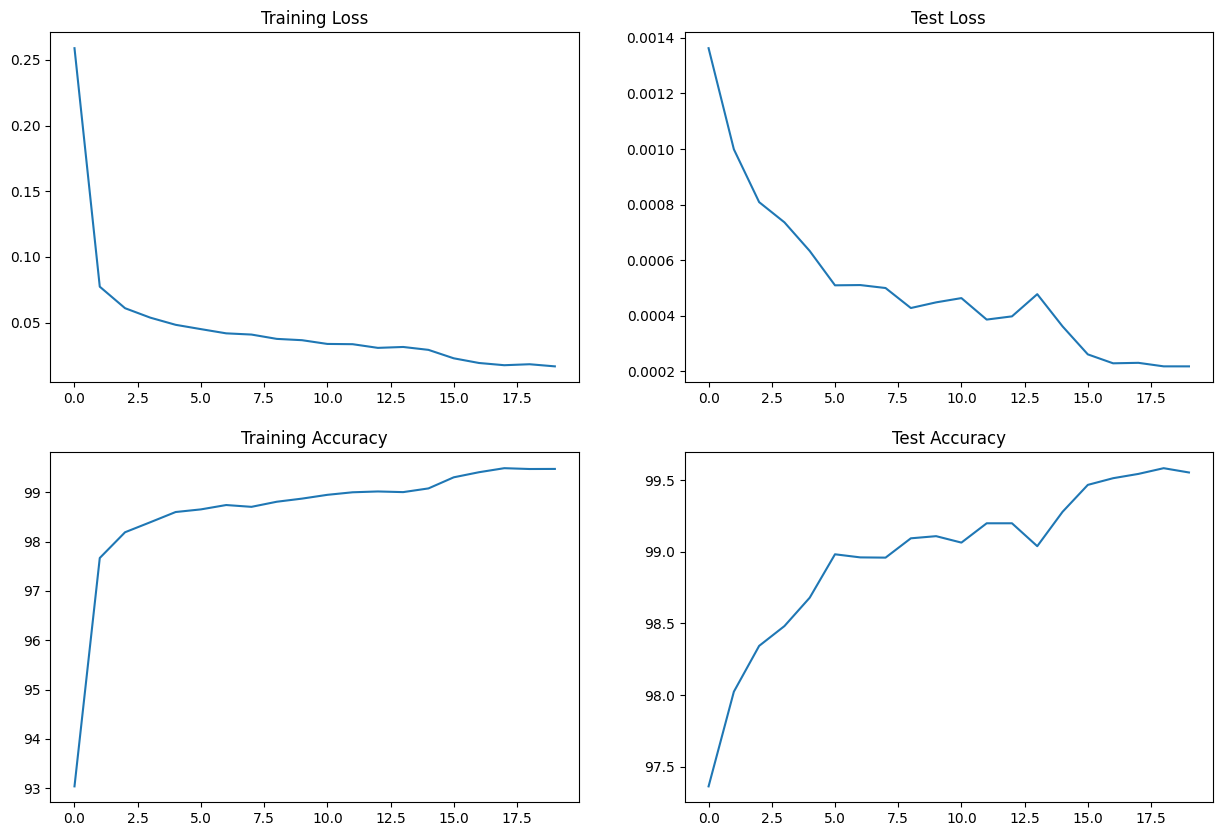

In [9]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        #28X28
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3) # 26X26X16
        self.bn1 = nn.BatchNorm2d(16)   # 26x26X16
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3) # 24X24X16
        self.bn2 = nn.BatchNorm2d(16)   # 24X24X16
        self.pool1 = nn.MaxPool2d(2, 2) # 12X12X16
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3) # 10X10X32
        self.bn3 = nn.BatchNorm2d(16)   # 10X10X32
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3) # 8X8X32
        self.bn4 = nn.BatchNorm2d(32)   # 8X8X32
        self.pool2 = nn.MaxPool2d(2, 2) # 4X4X32
        self.conv5 = nn.Conv2d(32, 8, kernel_size=1) # 4X4X4 ??
        self.conv6 = nn.Conv2d(8, 16, kernel_size=3, padding=1) # 4X4X8
        self.bn6 = nn.BatchNorm2d(16)   # 4X4X8
        self.conv7 = nn.Conv2d(16, 16, kernel_size=3, padding=0) # 2X2X16
        self.bn7 = nn.BatchNorm2d(16)   # 2X2X16
        self.fc1 = nn.Linear(16*2*2, 40)
        self.drop = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), 2)
        x = F.relu(self.bn2(self.conv2(x)), 2)
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)), 2)
        x = F.relu(self.bn4(self.conv4(x)), 2)
        x = self.pool2(x)
        x = self.conv5(x)
        x = F.relu(self.bn6(self.conv6(x)), 2)
        x = F.relu(self.bn7(self.conv7(x)), 2)
        x = x.view(-1,16*2*2)
        x = self.drop(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")